# ADR Report Pattern Analysis
This notebook explores trends and patterns in Adverse Drug Reaction (ADR) reports using synthetic data.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sample_adr_data.csv')
df.head()

,Report_ID,Patient_Age,Gender,Suspected_Drug,Reaction_Description,Report_Date,Outcome,Country
0,RPT1000,61,Male,Omeprazole,Insomnia,2020-09-29,Recovered,South Africa
1,RPT1001,24,Other,Ibuprofen,Headache,2021-01-11,Hospitalization,Japan
2,RPT1002,81,Male,Lisinopril,Fever,2024-03-20,Unknown,Brazil
3,RPT1003,70,Male,Ibuprofen,Insomnia,2025-01-19,Hospitalization,Germany
4,RPT1004,30,Female,Ciprofloxacin,Allergic reaction,2022-01-19,Not Recovered,UK


In [5]:
# Basic dataset info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Report_ID             500 non-null    object
 1   Patient_Age           500 non-null    int64 
 2   Gender                500 non-null    object
 3   Suspected_Drug        500 non-null    object
 4   Reaction_Description  500 non-null    object
 5   Report_Date           500 non-null    object
 6   Outcome               500 non-null    object
 7   Country               500 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.4+ KB


Report_ID               0
Patient_Age             0
Gender                  0
Suspected_Drug          0
Reaction_Description    0
Report_Date             0
Outcome                 0
Country                 0
dtype: int64

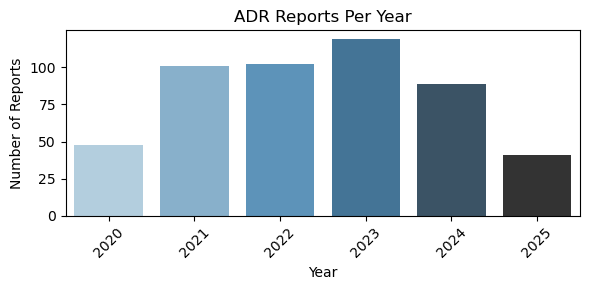

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame setup (remove this part if your df is already loaded)
# df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Convert 'Report_Date' to datetime
df['Report_Date'] = pd.to_datetime(df['Report_Date'], errors='coerce')

# Drop rows with invalid or missing dates
df = df.dropna(subset=['Report_Date'])

# Create 'Year' and 'Month' columns
df['Year'] = df['Report_Date'].dt.year
df['Month'] = df['Report_Date'].dt.month

# Plot: ADR Reports Per Year
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Year', hue='Year', palette='Blues_d', legend=False)
plt.title('ADR Reports Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure and show it
plt.savefig('outputs/adr_reports_per_year.png', dpi=300)
plt.show()

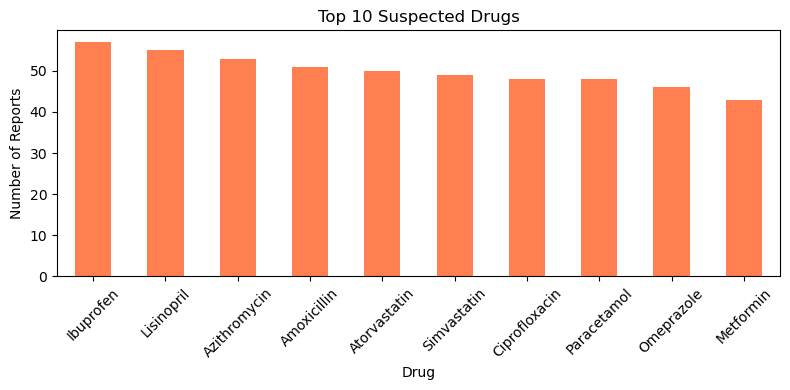

In [23]:
# Top 10 drugs associated with ADRs
import os
import matplotlib.pyplot as plt

# Ensure the output directory exists
os.makedirs('outputs', exist_ok=True)

# Top 10 suspected drugs
top_drugs = df['Suspected_Drug'].value_counts().head(10)

# Plotting
plt.figure(figsize=(8, 4))
top_drugs.plot(kind='bar', color='coral')
plt.title('Top 10 Suspected Drugs')
plt.ylabel('Number of Reports')
plt.xlabel('Drug')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/top_10_suspected_drugs.png', dpi=300)  # Save before show
plt.show()
plt.close()


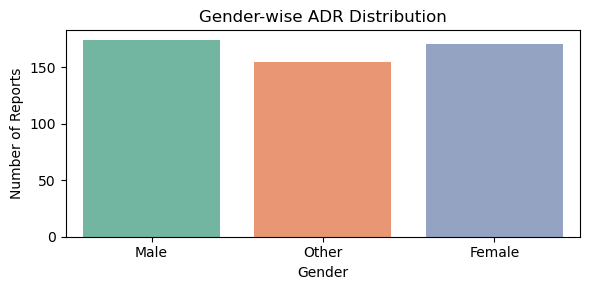

In [19]:
# Gender-wise distribution of ADR reports
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the output directory exists
os.makedirs('outputs', exist_ok=True)

# Plot: Gender-wise ADR Distribution
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Gender', hue='Gender', palette='Set2', legend=False)
plt.title('Gender-wise ADR Distribution')
plt.ylabel('Number of Reports')
plt.xlabel('Gender')
plt.tight_layout()
plt.savefig('outputs/gender_distribution.png', dpi=300)
plt.show()
plt.close()


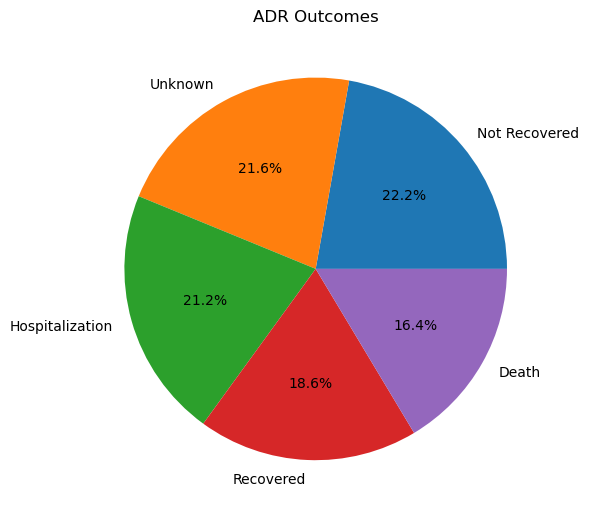

In [49]:
# Outcome distribution
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='ADR Outcomes')
plt.ylabel('')
plt.tight_layout()
plt.show()
plt.savefig('outputs/outcome_distribution_pie.png', dpi=300)
plt.close()

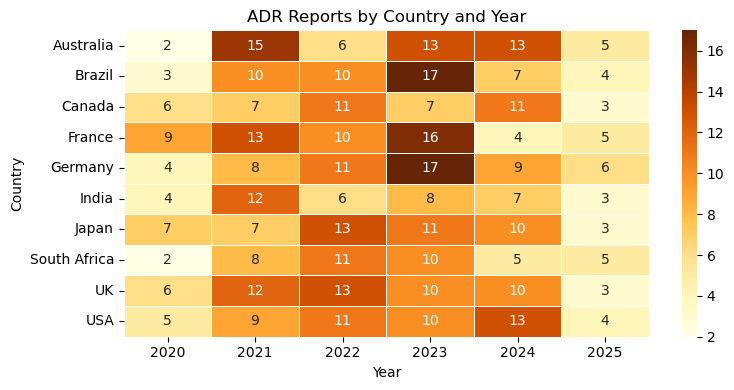

In [47]:
country_year_matrix = df.pivot_table(index='Country', columns='Year', values='Report_ID', aggfunc='count').fillna(0)
plt.figure(figsize=(8, 4))
sns.heatmap(country_year_matrix, cmap='YlOrBr', linewidths=0.5, annot=True, fmt='.0f')
plt.title('ADR Reports by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()